# SPSA vs. Other optimization methods

In [1]:
# have to be run only once to have the project root directory as CWD
import os
os.chdir("..")

In [4]:
# Imports
from GB_ZO.algorithms import *
import GB_ZO.mountain_car.moutain_car as rl 
import GB_ZO.linear_regression.linear_regression as lr
import GB_ZO.linear_regression.plot as lr_plot
import GB_ZO.kmeans_soft_clustering.kmeans as kmeans
import GB_ZO.kmeans_soft_clustering.plot as kmeans_plot

%load_ext autoreload 
%autoreload 2

Creating 5 blobs


## 1. Linear Regression 

Using SPSA
[2. 3.]


Performing gradient descent: 100%|██████████| 1000/1000 [00:00<00:00, 8818.12iteration/s]

Final parameters (spsa):
Loss: 0.155995
Param Error: 0.093386


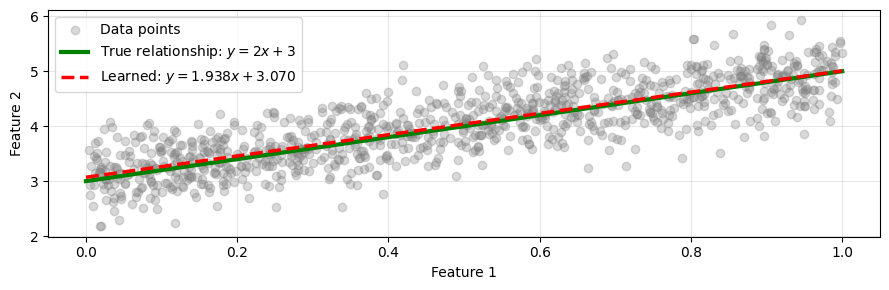

{'multi-point': 'GB_ZO/linear_regression/results/multi-point_1D.json', 'spsa': 'GB_ZO/linear_regression/results/spsa_1D.json', 'analytical': 'GB_ZO/linear_regression/results/analytical_1D.json'}
dict_keys(['multi-point', 'spsa', 'analytical'])


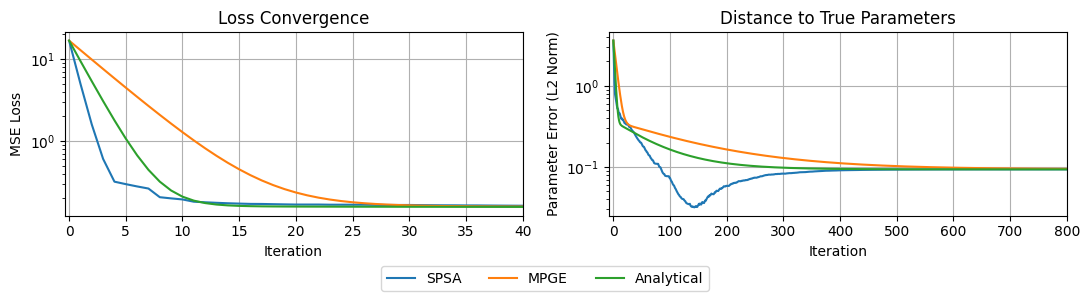

In [3]:
# METHOD AND PARAMETERS HAVE TO BE CHANGED INSIDE THE RELEVANT SCRIPTS
# getting results
lr.main()
# plotting them
lr_plot.main()

## 2. K-Means

Using SPSA
Problem shape is (10,)


Performing gradient descent: 100%|██████████| 10000/10000 [00:05<00:00, 1768.44iteration/s]


Final cluster centers:
[[ -1.34669278   0.45766023]
 [ -6.38168963  -8.1594254 ]
 [-10.84419637   7.87903746]
 [  5.21808511   3.17566613]
 [ -0.56346052  11.1024415 ]]
Final objective value: 4099.9383


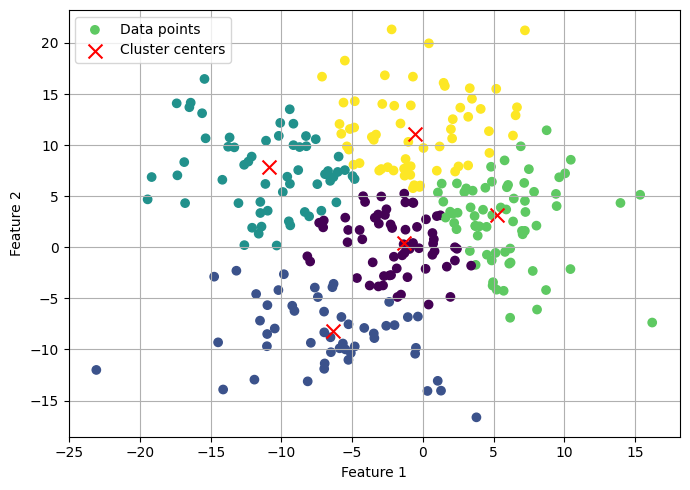

Computing the loss: 100%|██████████| 10001/10001 [00:02<00:00, 3722.17x/s]


Final loss: 4099.938264329006


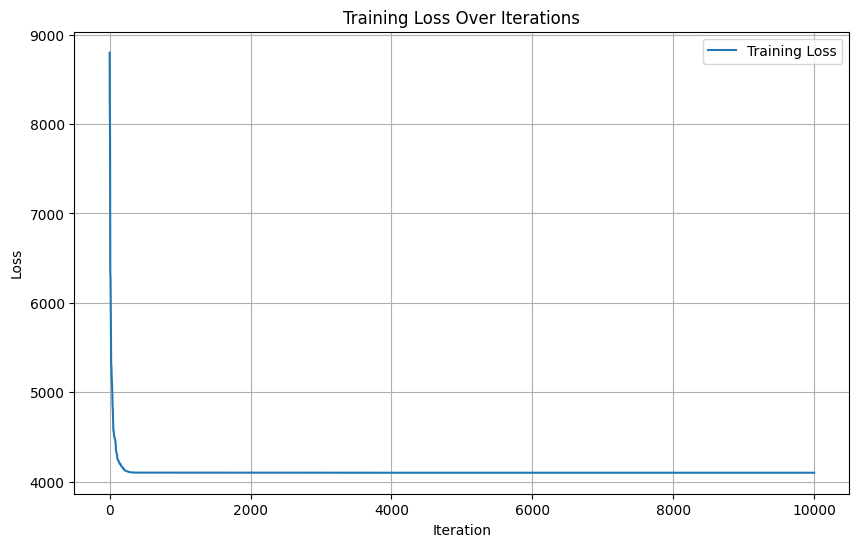

{'spsa': 'GB_ZO/kmeans_soft_clustering/results/spsa_2D.json', 'analytical': 'GB_ZO/kmeans_soft_clustering/results/analytical_2D.json', 'multi-point': 'GB_ZO/kmeans_soft_clustering/results/multi-point_2D.json'}
dict_keys(['spsa', 'analytical', 'multi-point'])


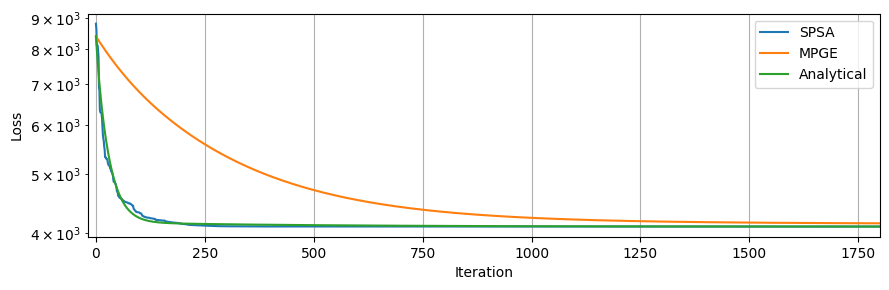

In [4]:
# METHOD AND PARAMETERS HAVE TO BE CHANGED INSIDE THE RELEVANT SCRIPTS
# getting results
kmeans.main()
# plotting them
kmeans_plot.main()

## 3. Reinforcement Learning (Mountain Car)

In [32]:
net = rl.MLPPolicy()
num_params = net.get_params().size
num_params

51

This means that Multipoint Gradient Estimator takes about ~51x longer than SPSA to estimate the gradient!

Let's perform a grid-search on the hyperparameters of SPSA. (Unfortunately, MPGE never reaches the goal no matter the hyperparameters.)

In [33]:
iterations = 500
alpha_list = [1.0, 0.5, 0.25]
K_list = [10.0, 5.0, 2.5]

spsa_histories, spsa_best_params = rl.grid_search(iterations, spsa_gradient, alpha_list, K_list)

--- GRID SEARCH ---
--------------------------------------------

### Training for alpha=1.0, K=10.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.96
Step 2 - New best reward: -184.45
Step 8 - New best reward: -180.83
Step 10 - New best reward: -166.79
Step 26 - New best reward: -165.26
Step 88 - New best reward: -162.38
Step 161 - New best reward: -157.03
Step 202 - New best reward: -153.00
Step 204 - New best reward: -151.64


--------------------------------------------

### Training for alpha=1.0, K=5.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.74
Step 1 - New best reward: -188.52
Step 2 - New best reward: -181.26
Step 14 - New best reward: -174.49
Step 19 - New best reward: -172.52
Step 60 - New best reward: -170.55
Step 74 - New best reward: -168.29
Step 77 - New best reward: -162.51
Step 86 - New best reward: -160.59
Step 88 - New best reward: -157.91
Step 103 - New best reward: -154.51
Step 202 - New best reward: -151.81
Step 204 - New best reward: -150.51
Step 239 - New best reward: -149.57
Step 339 - New best reward: -148.24
Step 347 - New best reward: -146.68
Step 352 - New best reward: -28.98
Step 358 - New best reward:  4.81
Step 367 - New best reward:  6.84
Step 368 - New best reward:  8.08
Step 424 - New best reward:  11.48


--------------------------------------------

### Training for alpha=1.0, K=2.5 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 2 - New best reward: -181.26
Step 11 - New best reward: -179.38
Step 60 - New best reward: -176.44


--------------------------------------------

### Training for alpha=0.5, K=10.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.41
Step 3 - New best reward: -186.96
Step 4 - New best reward: -186.55
Step 12 - New best reward: -185.36
Step 17 - New best reward: -183.40


--------------------------------------------

### Training for alpha=0.5, K=5.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.59
Step 3 - New best reward: -186.91
Step 4 - New best reward: -184.10
Step 8 - New best reward: -183.91
Step 9 - New best reward: -183.54
Step 10 - New best reward: -172.50
Step 12 - New best reward: -169.17
Step 28 - New best reward: -168.97
Step 33 - New best reward: -164.61
Step 37 - New best reward: -157.96
Step 46 - New best reward: -157.27
Step 53 - New best reward: -156.18
Step 59 - New best reward: -15.94
Step 60 - New best reward: -11.10
Step 61 - New best reward: -5.28
Step 71 - New best reward: -2.07
Step 77 - New best reward:  15.51
Step 81 - New best reward:  16.20
Step 82 - New best reward:  16.56
Step 86 - New best reward:  19.01
Step 87 - New best reward:  19.37
Step 93 - New best reward:  29.87
Step 371 - New best reward:  30.83


--------------------------------------------

### Training for alpha=0.5, K=2.5 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.75
Step 2 - New best reward: -181.26
Step 11 - New best reward: -179.38
Step 60 - New best reward: -176.44


--------------------------------------------

### Training for alpha=0.25, K=10.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.41
Step 3 - New best reward: -187.05
Step 4 - New best reward: -186.57
Step 12 - New best reward: -185.51
Step 17 - New best reward: -182.51
Step 213 - New best reward: -182.46


--------------------------------------------

### Training for alpha=0.25, K=5.0 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.41
Step 3 - New best reward: -187.05
Step 4 - New best reward: -186.57
Step 12 - New best reward: -185.51
Step 17 - New best reward: -182.62


--------------------------------------------

### Training for alpha=0.25, K=2.5 ###


  0%|          | 0/500 [00:00<?, ?it/s]

Step 0 - New best reward: -190.51
Step 1 - New best reward: -187.41
Step 2 - New best reward: -181.26
Step 11 - New best reward: -179.38
Step 49 - New best reward: -151.21
Step 56 - New best reward: -149.96
Step 59 - New best reward: -31.38
Step 67 - New best reward: -29.04
Step 78 - New best reward: -24.45
Step 98 - New best reward: -11.52
Step 99 - New best reward: -4.72
Step 313 - New best reward:  1.05
Step 315 - New best reward:  1.39
Step 335 - New best reward:  1.62
Step 347 - New best reward:  13.62
Step 383 - New best reward:  14.52
Step 439 - New best reward:  14.58


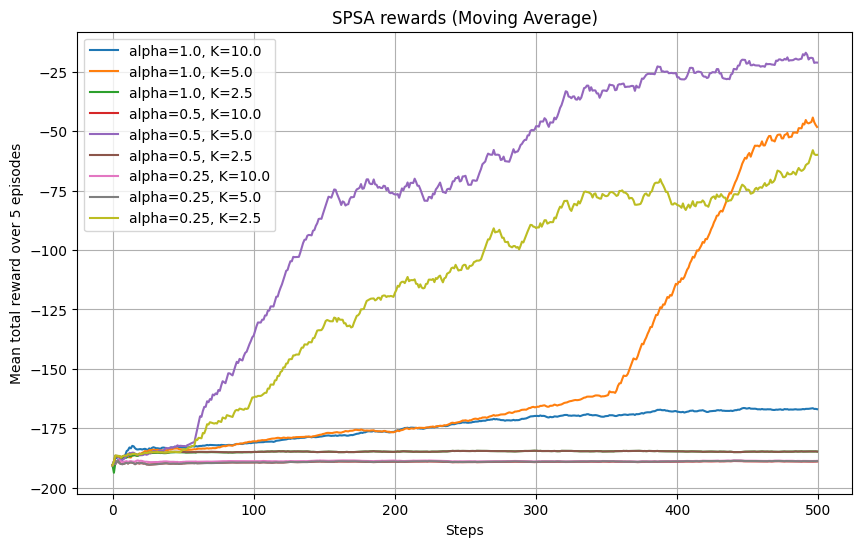

In [34]:
# Plot the results
rl.plot_grid_search(spsa_histories, 'SPSA rewards (Moving Average)', 100)

Unfortunately, despite many attempts, MPGE never learns to reach the goal no matter the hyperparameters used. Run a (time-consuming) grid-search with MPGE to notice that. MPGE only learns to go in one direction.

Here we still try with reasonable parameters alpha=0.5 and K=1.0

In [35]:
iterations = 100 # Takes about the same amount of time as 51 * 100 = 5100 SPSA iterations
alpha = 0.5
K = 1.0

In [36]:
print("Training with Multipoint Gradient Estimator...")
multi_history, multi_best_params = rl.train(multipoint_gradient_estimator, iterations=iterations, alpha_init=alpha, K_init=K)

Training with Multipoint Gradient Estimator...


  0%|          | 0/100 [00:00<?, ?it/s]

Step 0 - New best reward: -186.05
Step 10 - New best reward: -185.72
Step 51 - New best reward: -185.48
Step 60 - New best reward: -184.46


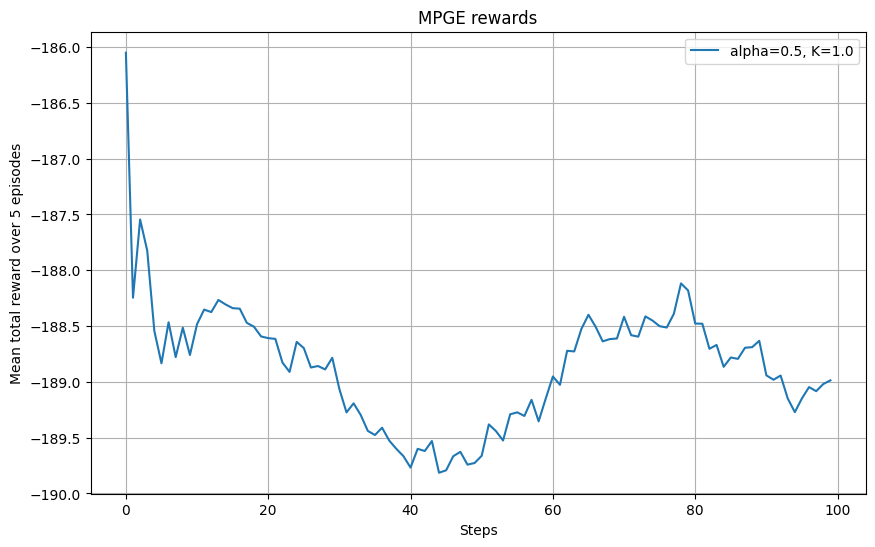

In [37]:
rl.plot_grid_search({(alpha, K): multi_history}, 'MPGE rewards', window_size=20)

In [38]:
# Best SPSA policy visualization
rl.visualize_policy(spsa_best_params[(0.5, 5.0)])

In [39]:
# Best Multipoint Gradient Estimator policy visualization
rl.visualize_policy(multi_best_params)

## 4. Architecture Optimization

In [1]:
import random
import numpy as np
import tensorflow as tf
from NAS_spsa.spsa_NAS import load_wine_data, run_NAS_spsa, final_accuracy, grid_search
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Load the Wine Quality dataset
X_train, X_val, X_test, y_train, y_val, y_test, num_classes = load_wine_data()

2025-06-13 12:33:03.022162: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Grid search architecture benchmark
best_grid_arch, worst_grid_arch = grid_search(X_train, X_val, y_train, y_val, num_classes)
best_grid_acc = final_accuracy(X_train, X_test, y_train, y_test, num_classes, best_grid_arch)
worst_grid_acc= final_accuracy(X_train, X_test, y_train, y_test, num_classes,worst_grid_arch)

print(f"Best Grid Search Architecture {best_grid_arch} : Accuracy {best_grid_acc:.4f}")
print(f"Worst Grid Search Architecture {worst_grid_arch} : Accuracy {worst_grid_acc:.4f}")

Configuration 01: Loss=1.2692, Arch=[32, 32, 0]
Configuration 02: Loss=1.2037, Arch=[32, 32, 64]
Configuration 03: Loss=1.0827, Arch=[32, 32, 128]
Configuration 04: Loss=1.0825, Arch=[32, 32, 256]
Configuration 05: Loss=1.0830, Arch=[32, 64, 0]
Configuration 06: Loss=1.0901, Arch=[32, 64, 64]
Configuration 07: Loss=1.0758, Arch=[32, 64, 128]
Configuration 08: Loss=1.0161, Arch=[32, 64, 256]
Configuration 09: Loss=1.0838, Arch=[32, 128, 0]
Configuration 10: Loss=1.0680, Arch=[32, 128, 64]
Configuration 11: Loss=1.0348, Arch=[32, 128, 128]
Configuration 12: Loss=1.0240, Arch=[32, 128, 256]
Configuration 13: Loss=1.0186, Arch=[32, 256, 0]
Configuration 14: Loss=1.0335, Arch=[32, 256, 64]
Configuration 15: Loss=0.9776, Arch=[32, 256, 128]
Configuration 16: Loss=0.9916, Arch=[32, 256, 256]
Configuration 17: Loss=1.0338, Arch=[32, 512, 0]
Configuration 18: Loss=0.9819, Arch=[32, 512, 64]
Configuration 19: Loss=0.9797, Arch=[32, 512, 128]
Configuration 20: Loss=0.9631, Arch=[32, 512, 256]
Con

Iter 01: Loss=0.9361, Best Loss=0.9361, Arch=[143, 118, 57], Best Arch=[143, 118, 57]
Iter 02: Loss=0.9355, Best Loss=0.9355, Arch=[163, 125, 54], Best Arch=[163, 125, 54]
Iter 03: Loss=0.9354, Best Loss=0.9354, Arch=[196, 150, 62], Best Arch=[196, 150, 62]
Iter 04: Loss=0.9356, Best Loss=0.9354, Arch=[223, 163, 66], Best Arch=[196, 150, 62]
Iter 05: Loss=0.9429, Best Loss=0.9354, Arch=[250, 181, 64], Best Arch=[196, 150, 62]
Iter 06: Loss=0.9377, Best Loss=0.9354, Arch=[271, 193, 62], Best Arch=[196, 150, 62]
Iter 07: Loss=0.9379, Best Loss=0.9354, Arch=[288, 199, 62], Best Arch=[196, 150, 62]
Iter 08: Loss=0.9286, Best Loss=0.9286, Arch=[303, 202, 62], Best Arch=[303, 202, 62]
Iter 09: Loss=0.9116, Best Loss=0.9116, Arch=[315, 206, 62], Best Arch=[315, 206, 62]
Iter 10: Loss=0.9193, Best Loss=0.9116, Arch=[328, 213, 64], Best Arch=[315, 206, 62]
Iter 11: Loss=0.9269, Best Loss=0.9116, Arch=[340, 220, 65], Best Arch=[315, 206, 62]
Iter 12: Loss=0.9286, Best Loss=0.9116, Arch=[351, 226

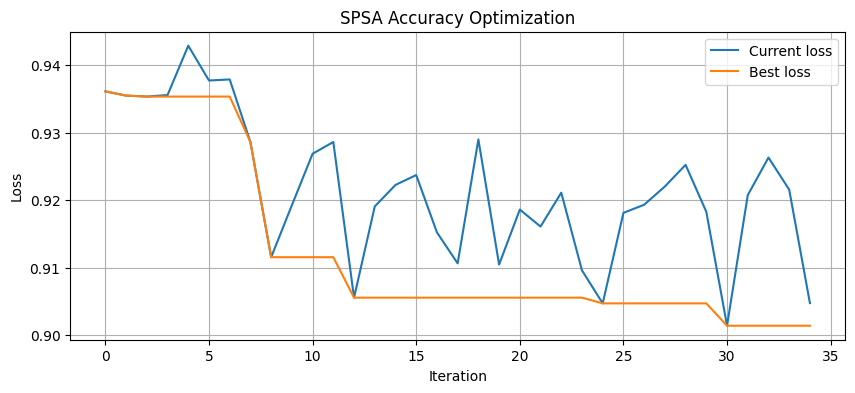

Best architecture: [480, 260, 97]
SPSA Architecture [480, 260, 97] - Accuracy: 0.5938


In [3]:
# Run spsa with small initial layer sizes
best_spsa_arch = run_NAS_spsa(X_train, X_val, y_train, y_val, num_classes, x0=[0.1, 0.1, 0.1], a=0.6, num_iter=35)
print("Best architecture:", best_spsa_arch)
spsa_acc = final_accuracy(X_train, X_test, y_train, y_test, num_classes, best_spsa_arch)
print(f"SPSA Architecture {best_spsa_arch} - Accuracy: {spsa_acc:.4f}")

Iter 01: Loss=0.8877, Best Loss=0.8877, Arch=[535, 535, 259], Best Arch=[535, 535, 259]
Iter 02: Loss=0.8920, Best Loss=0.8877, Arch=[539, 539, 262], Best Arch=[535, 535, 259]
Iter 03: Loss=0.8936, Best Loss=0.8877, Arch=[541, 543, 264], Best Arch=[535, 535, 259]
Iter 04: Loss=0.8942, Best Loss=0.8877, Arch=[542, 545, 265], Best Arch=[535, 535, 259]
Iter 05: Loss=0.8820, Best Loss=0.8820, Arch=[544, 548, 266], Best Arch=[544, 548, 266]
Iter 06: Loss=0.8904, Best Loss=0.8820, Arch=[545, 551, 266], Best Arch=[544, 548, 266]
Iter 07: Loss=0.8885, Best Loss=0.8820, Arch=[546, 554, 265], Best Arch=[544, 548, 266]
Iter 08: Loss=0.8905, Best Loss=0.8820, Arch=[548, 556, 264], Best Arch=[544, 548, 266]
Iter 09: Loss=0.8880, Best Loss=0.8820, Arch=[550, 559, 264], Best Arch=[544, 548, 266]
Iter 10: Loss=0.8820, Best Loss=0.8820, Arch=[554, 564, 265], Best Arch=[544, 548, 266]
Iter 11: Loss=0.8926, Best Loss=0.8820, Arch=[560, 570, 267], Best Arch=[544, 548, 266]
Iter 12: Loss=0.8808, Best Loss=

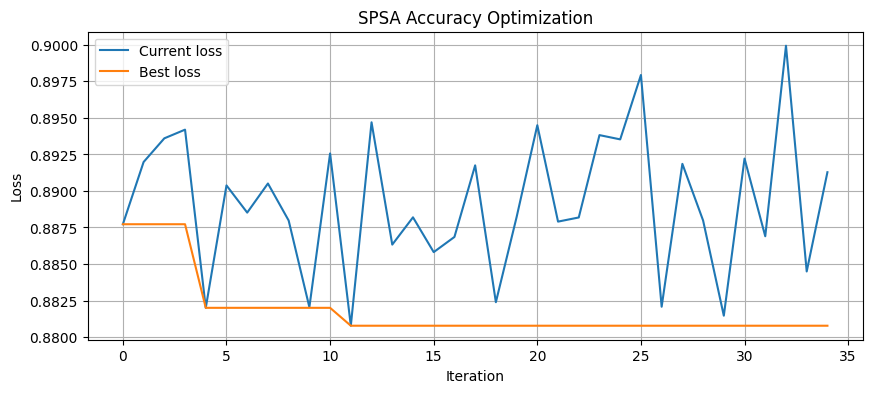

Best architecture: [565, 575, 268]
SPSA Architecture [565, 575, 268] - Accuracy on test set: 0.5875


In [4]:
# Run NAS spsa with with  medium initial layers sizes
best_spsa_arch = run_NAS_spsa(X_train, X_val, y_train, y_val, num_classes, x0=[0.5, 0.5, 0.5], a=0.6, num_iter=35)
print("Best architecture:", best_spsa_arch)
spsa_acc = final_accuracy(X_train, X_test, y_train, y_test, num_classes, best_spsa_arch)
print(f"SPSA Architecture {best_spsa_arch} - Accuracy on test set: {spsa_acc:.4f}")

Iter 01: Loss=0.9419, Best Loss=0.9419, Arch=[140, 140, 55], Best Arch=[140, 140, 55]
Iter 02: Loss=0.9500, Best Loss=0.9419, Arch=[150, 150, 61], Best Arch=[140, 140, 55]
Iter 03: Loss=0.9478, Best Loss=0.9419, Arch=[157, 157, 64], Best Arch=[140, 140, 55]
Iter 04: Loss=0.9258, Best Loss=0.9258, Arch=[167, 166, 69], Best Arch=[167, 166, 69]
Iter 05: Loss=0.9194, Best Loss=0.9194, Arch=[179, 178, 76], Best Arch=[179, 178, 76]
Iter 06: Loss=0.9356, Best Loss=0.9194, Arch=[188, 187, 80], Best Arch=[179, 178, 76]
Iter 07: Loss=0.9185, Best Loss=0.9185, Arch=[196, 194, 83], Best Arch=[196, 194, 83]
Iter 08: Loss=0.9241, Best Loss=0.9185, Arch=[204, 201, 86], Best Arch=[196, 194, 83]
Iter 09: Loss=0.9221, Best Loss=0.9185, Arch=[221, 218, 95], Best Arch=[196, 194, 83]
Iter 10: Loss=0.9310, Best Loss=0.9185, Arch=[234, 231, 101], Best Arch=[196, 194, 83]
Iter 11: Loss=0.9143, Best Loss=0.9143, Arch=[245, 240, 106], Best Arch=[245, 240, 106]
Iter 12: Loss=0.9280, Best Loss=0.9143, Arch=[253, 

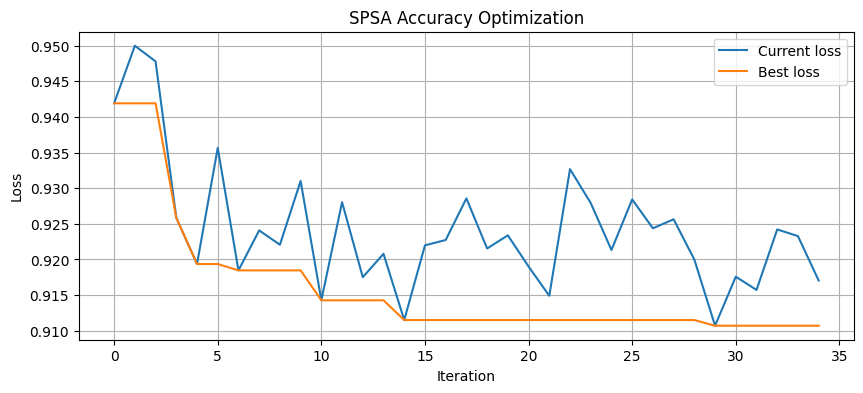

Best architecture: [292, 279, 127]
SPSA Architecture [292, 279, 127] - Accuracy on test set: 0.5875


In [5]:
# Run NAS spsa with small initial layer sizes and small step size
best_spsa_arch = run_NAS_spsa(X_train, X_val, y_train, y_val, num_classes, x0=[0.1, 0.1, 0.1], a=0.1, num_iter=35)
print("Best architecture:", best_spsa_arch)
spsa_acc = final_accuracy(X_train, X_test, y_train, y_test, num_classes, best_spsa_arch)
print(f"SPSA Architecture {best_spsa_arch} - Accuracy on test set: {spsa_acc:.4f}")

Iter 01: Loss=0.8916, Best Loss=0.8916, Arch=[826, 825, 409], Best Arch=[826, 825, 409]
Iter 02: Loss=0.8820, Best Loss=0.8820, Arch=[824, 827, 410], Best Arch=[824, 827, 410]
Iter 03: Loss=0.8753, Best Loss=0.8753, Arch=[822, 828, 411], Best Arch=[822, 828, 411]
Iter 04: Loss=0.8858, Best Loss=0.8753, Arch=[820, 828, 412], Best Arch=[822, 828, 411]
Iter 05: Loss=0.8868, Best Loss=0.8753, Arch=[818, 829, 413], Best Arch=[822, 828, 411]
Iter 06: Loss=0.8861, Best Loss=0.8753, Arch=[818, 831, 413], Best Arch=[822, 828, 411]
Iter 07: Loss=0.8948, Best Loss=0.8753, Arch=[817, 833, 413], Best Arch=[822, 828, 411]
Iter 08: Loss=0.8768, Best Loss=0.8753, Arch=[816, 835, 414], Best Arch=[822, 828, 411]
Iter 09: Loss=0.8846, Best Loss=0.8753, Arch=[816, 836, 414], Best Arch=[822, 828, 411]
Iter 10: Loss=0.8859, Best Loss=0.8753, Arch=[817, 837, 414], Best Arch=[822, 828, 411]
Iter 11: Loss=0.8831, Best Loss=0.8753, Arch=[817, 838, 414], Best Arch=[822, 828, 411]
Iter 12: Loss=0.8906, Best Loss=

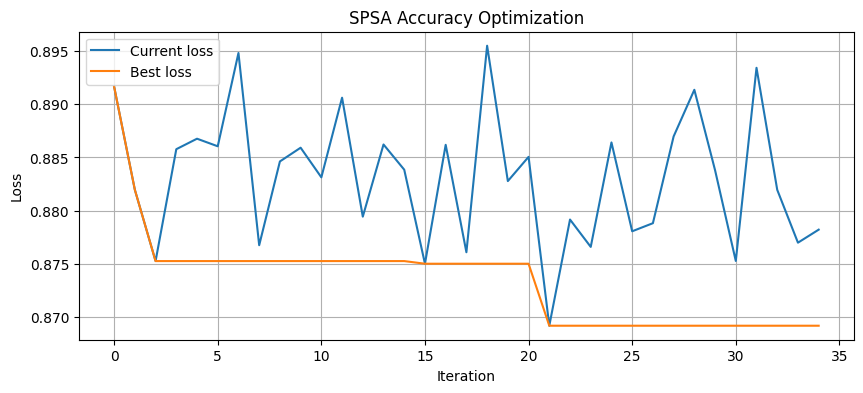

Best architecture: [802, 843, 420]
SPSA Architecture [802, 843, 420] - Accuracy on test set : 0.6000


In [6]:
# Run NAS spsa with large initial layer sizes 
best_spsa_arch = run_NAS_spsa(X_train, X_val, y_train, y_val, num_classes, x0=[0.8, 0.8, 0.8], a=0.6, num_iter=35)
print("Best architecture:", best_spsa_arch)
spsa_acc = final_accuracy(X_train, X_test, y_train, y_test, num_classes, best_spsa_arch)
print(f"SPSA Architecture {best_spsa_arch} - Accuracy on test set : {spsa_acc:.4f}")